# M254 Project Dimension Reduction & Clustering

# Data Preprocessing

In [1]:
import pandas as pd

In [16]:
import numpy as np

In [27]:
##plot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("/Users/suruisun/Downloads/2017_Spring/M254/Project_Data/Data/df_t.csv")

In [3]:
df.head()

,Unnamed: 0,A1BG,A1BGAS,A1CF,A2BP1,A2LD1,A2ML1,A4GALT,AAA1,AAAS,...,IL1F7,TNFAIP8L2,DDO,GPIHBP1,MIR648,CPS1IT1,MIR454,SLC8A3,AMH,cell_labels
0,GSM896803,0.208771,0.518936,27.253081,2.140216,194.273647,0.257421,1.408977,0.426503,8.424508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
1,GSM896804,0.170077,0.422755,24.298588,2.041987,174.437777,0.298897,0.884788,0.483862,11.874233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
2,GSM896805,0.068468,0.113460,22.666473,1.669397,219.686574,0.279472,0.895296,0.198935,13.485601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
3,GSM896806,0.269232,0.701091,13.224831,2.912780,112.339567,1.556832,8.436193,0.237470,18.144124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zygote
4,GSM896807,0.226140,0.374740,5.352559,1.988286,195.810947,1.861479,7.440221,0.492786,11.819565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zygote


In [4]:
df.shape

(124, 20288)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,A1BG,A1BGAS,A1CF,A2BP1,A2LD1,A2ML1,A4GALT,AAA1,AAAS,AACS,...,IL1F7,TNFAIP8L2,DDO,GPIHBP1,MIR648,CPS1IT1,MIR454,SLC8A3,AMH,cell_labels
0,0.208771,0.518936,27.253081,2.140216,194.273647,0.257421,1.408977,0.426503,8.424508,15.589451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
1,0.170077,0.422755,24.298588,2.041987,174.437777,0.298897,0.884788,0.483862,11.874233,10.747077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
2,0.068468,0.113460,22.666473,1.669397,219.686574,0.279472,0.895296,0.198935,13.485601,16.542490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oocyte
3,0.269232,0.701091,13.224831,2.912780,112.339567,1.556832,8.436193,0.237470,18.144124,11.518785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zygote
4,0.226140,0.374740,5.352559,1.988286,195.810947,1.861479,7.440221,0.492786,11.819565,9.918721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zygote


In [7]:
df.shape

(124, 20287)

In [10]:
df_array = df.as_matrix()

In [8]:
from sklearn.preprocessing import scale

In [11]:
df_array_scale = scale(df_array[:,:-1])

/Users/suruisun/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [12]:
def draw_plot2d(obj,title):
    plt.figure(figsize=(16,12))
    plt.title("2-D Visualization of %s" %(title))
    plt.xlabel("%s1" %(title))
    plt.ylabel("%s2" %(title))
    l0 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Oocyte"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Oocyte"], color='g')
    l1 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Zygote"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Zygote"], color='b')
    l2 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "2-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "2-cell embryo"], color='r')

    l3 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "4-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "4-cell embryo"], color='c')
    l4 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "8-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "8-cell embryo"], color='m')
    l5 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Morulae"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Morulae"], color='y')

    l6 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Late blastocyst"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Late blastocyst"], color='k')
    l7 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#0"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#0"], color='#cc3300')
    l8 = plt.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#10"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#10"], color='#66ff66')

    ### add legend and save
    plt.legend((l0, l1, l2, l3, l4, l5, l6,l7,l8),
               ('Oocyte', 'Zygote', '2-cell embryo', '4-cell embryo', '8-cell embryo', 'Morulae', "Late blastocyst","hESC passage#0","hESC passage#10"),
               scatterpoints=1,
               loc='upper right',
               ncol=3,
               fontsize=8)
    #plt.show()
    plt.savefig("/Users/suruisun/Downloads/2017_Spring/M254/Project_Data/Data/%s2D.pdf" %(title))

In [28]:
def draw_plot3d(obj,title):
    fig = plt.figure(figsize=(16,12))
    plt.title("3-D Visualization of %s" %(title))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('%s1' %(title))
    ax.set_ylabel('%s2' %(title))
    ax.set_zlabel('%s3' %(title))

    l0 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Oocyte"],[obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Oocyte"],[obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "Oocyte"], color='g')
    l1 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Zygote"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Zygote"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "Zygote"], color='b')
    l2 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "2-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "2-cell embryo"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "2-cell embryo"], color='r')

    l3 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "4-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "4-cell embryo"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "4-cell embryo"], color='c')
    l4 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "8-cell embryo"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "8-cell embryo"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "8-cell embryo"], color='m')
    l5 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Morulae"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Morulae"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "Morulae"], color='y')

    l6 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "Late blastocyst"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "Late blastocyst"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "Late blastocyst"], color='k')
    l7 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#0"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#0"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#0"], color='#cc3300')
    l8 = ax.scatter([obj[i][0] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#10"], [obj[i][1] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#10"], [obj[i][2] for i in range(len(obj)) if df.cell_labels[i] == "hESC passage#10"], color='#66ff66')

    ### add legend and save
    plt.legend((l0, l1, l2, l3, l4, l5, l6,l7,l8),
               ('Oocyte', 'Zygote', '2-cell embryo', '4-cell embryo', '8-cell embryo', 'Morulae', "Late blastocyst","hESC passage#0","hESC passage#10"),
               scatterpoints=1,
               loc='upper right',
               ncol=3,
               fontsize=8)
    #plt.show()
    plt.savefig("/Users/suruisun/Downloads/2017_Spring/M254/Project_Data/Data/%s3D.pdf" %(title))

In [215]:
# draw_plot2d(pca_result,"PCA")
#draw_plot3d(tsne3_scaled_result,"TSNE")

# 1.1 NMF

In [14]:
from sklearn.decomposition import NMF

In [15]:
nmf = NMF(n_components=2)

In [19]:
## 1. nmf on non-scaled data
nmf_result = nmf.fit_transform(df_array[:,:-1])

In [20]:
nmf_result.shape

(124, 2)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

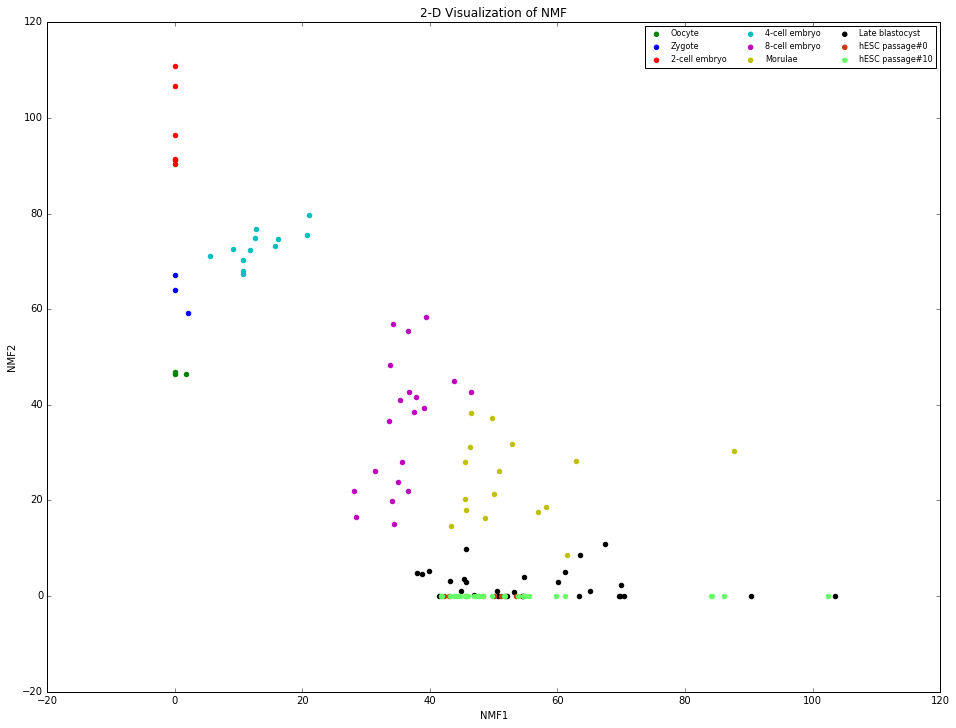

In [22]:
draw_plot2d(nmf_result,"NMF")

NMF cannot be applied to scaled data which has negative values.

In [24]:
## 3d
nmf3 = NMF(n_components=3)
nmf3_result = nmf3.fit_transform(df_array[:,:-1])

In [26]:
nmf3_result.shape

(124, 3)

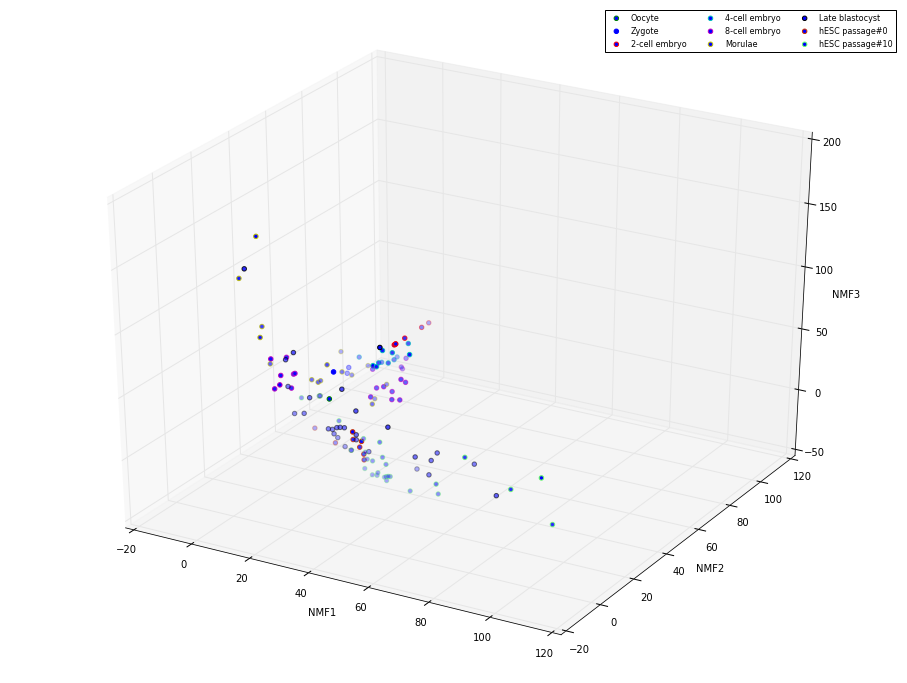

In [29]:
draw_plot3d(nmf3_result,"NMF")

We can see NMF 2D Plot provides clear visualization for different type of cells. Except for hSEC passage#0, hSEC passage#10, Late Blastocyst.

# 1.2 LDA

In [30]:
from sklearn.lda import LDA
lda = LDA(n_components=2)

/Users/suruisun/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [31]:
dict1 = {"Oocyte":0,"Zygote":1,"2-cell embryo":2,"4-cell embryo":3,"8-cell embryo":4,"Morulae":5,"Late blastocyst":6,
         "hESC passage#0":7,"hESC passage#10":8}

In [32]:
target = [dict1[i] for i in df_array[:,-1]]

In [33]:
target = np.array(target)

In [34]:
target

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8])

In [36]:
lda_result = lda.fit_transform(df_array[:,:-1],target)

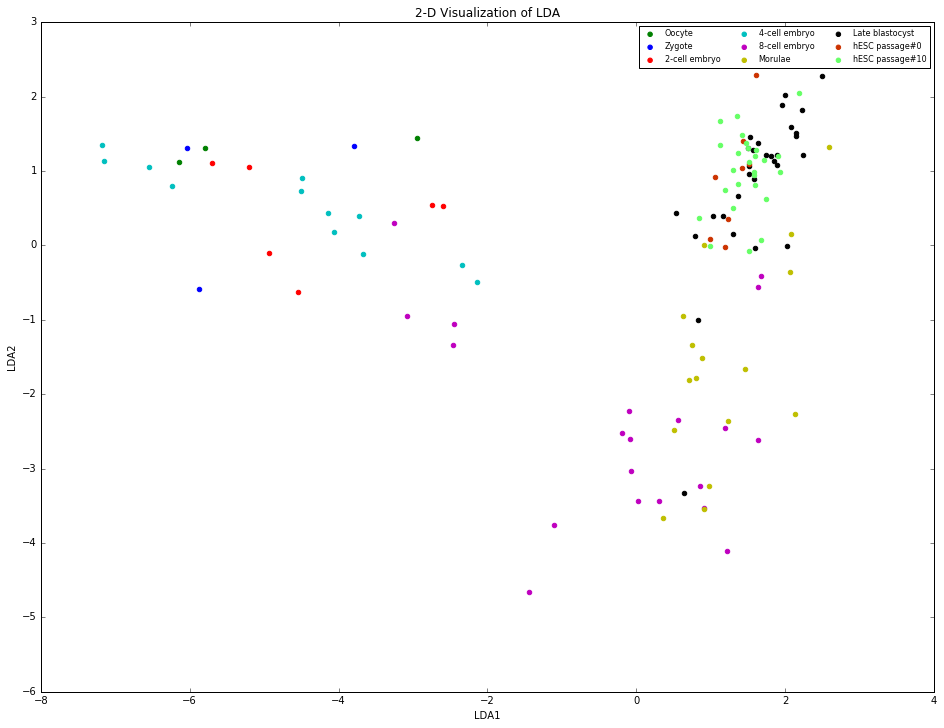

In [42]:
draw_plot2d(lda_result,"LDA")

In [39]:
lda_scaled_result = LDA(n_components=2).fit_transform(df_array_scale,target)

In [43]:
#draw_plot2d(lda_scaled_result,"LDAScaled")

In [48]:
lda3_result = LDA(n_components=3).fit_transform(df_array[:,:-1],target)

In [45]:
lda3_scaled_result = LDA(n_components=3).fit_transform(df_array_scale,target)

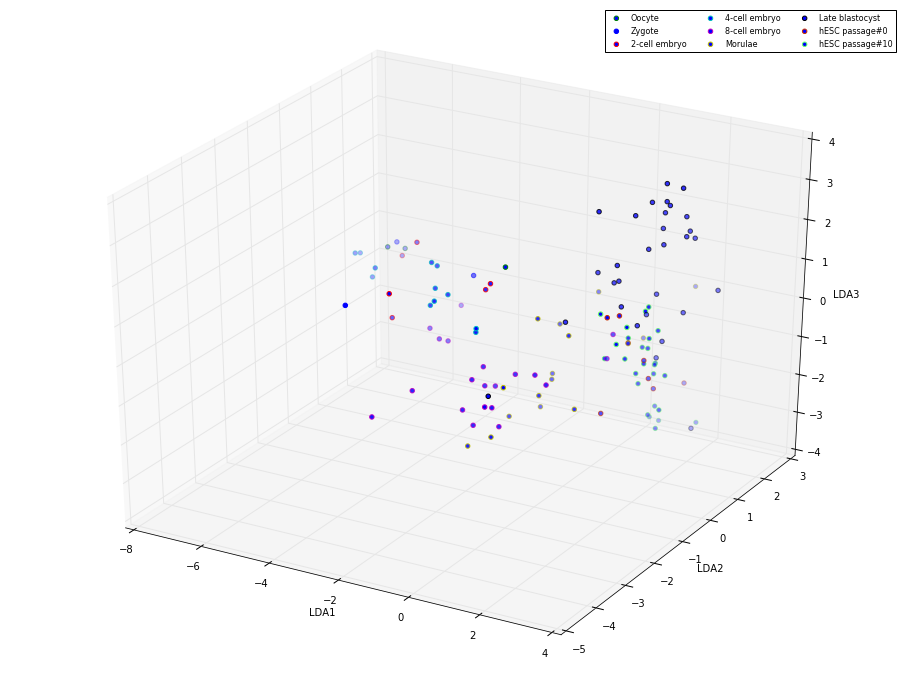

In [49]:
draw_plot3d(lda3_result,"LDA")

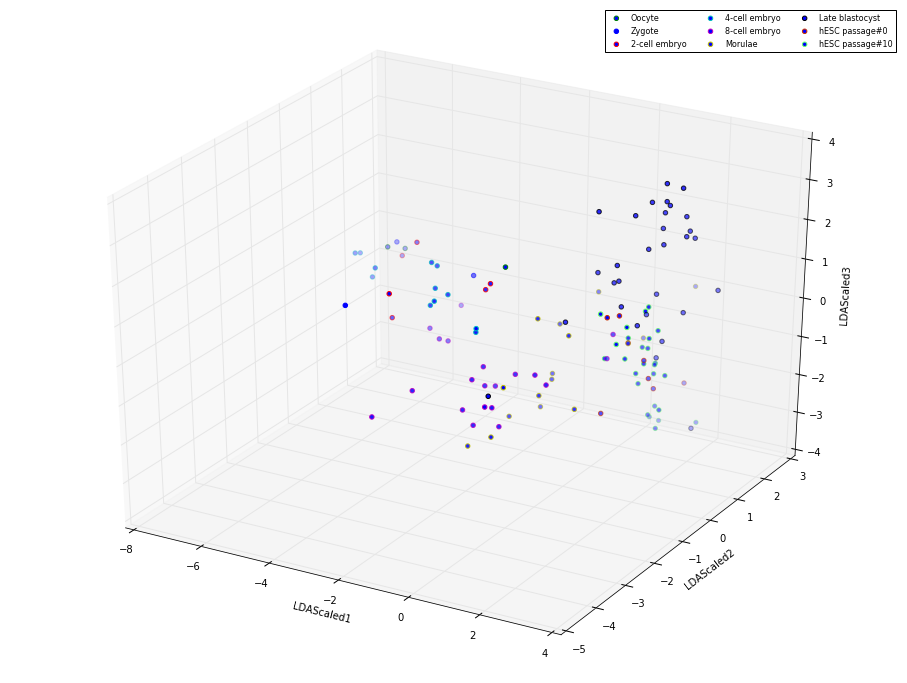

In [50]:
draw_plot3d(lda3_scaled_result,"LDAScaled")

Neither scaled nor normal data provide good visualization for cell types in LDA.

Neither 2d nor 3d plot provide good visualization for cell types in LDA.

# 1.3 TSNE

In [52]:
from sklearn.manifold import TSNE

In [53]:
tsne = TSNE(n_components=2,random_state=0)
tsne_result = tsne.fit_transform(df_array[:,:-1])

In [54]:
tsne = TSNE(n_components=2,random_state=0)
tsne_scaled_result = tsne.fit_transform(df_array_scale)

In [64]:
tsne3 = TSNE(n_components=3,random_state=0)
tsne3_result = tsne3.fit_transform(df_array[:,:-1])

In [57]:
tsne3 = TSNE(n_components=3,random_state=0) # n_components=3
tsne3_scaled_result = tsne3.fit_transform(df_array_scale)

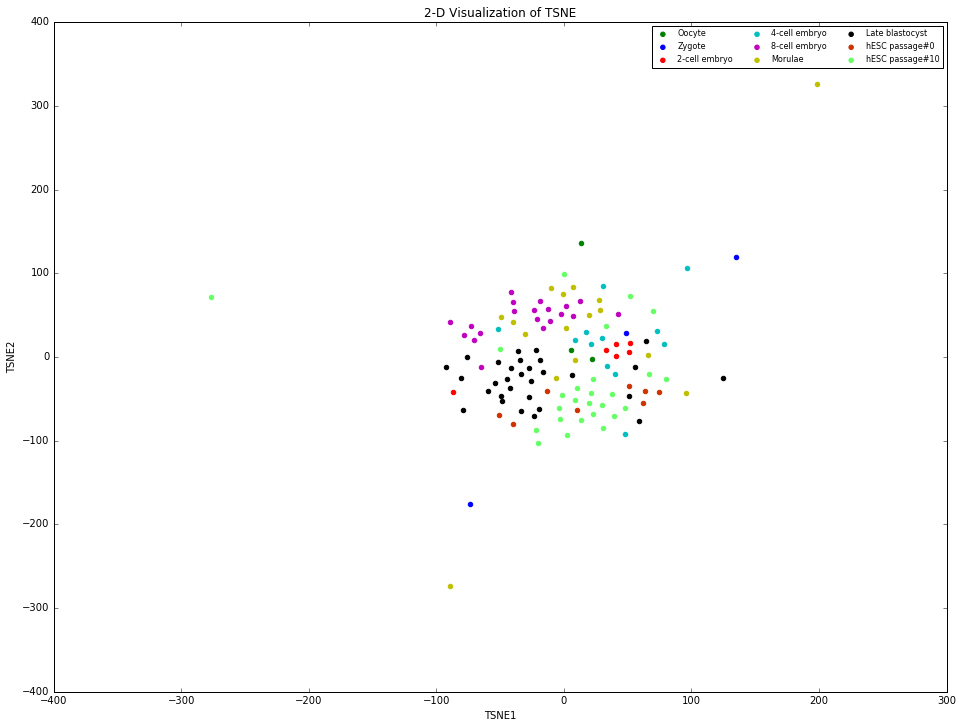

In [58]:
draw_plot2d(tsne_result,"TSNE")

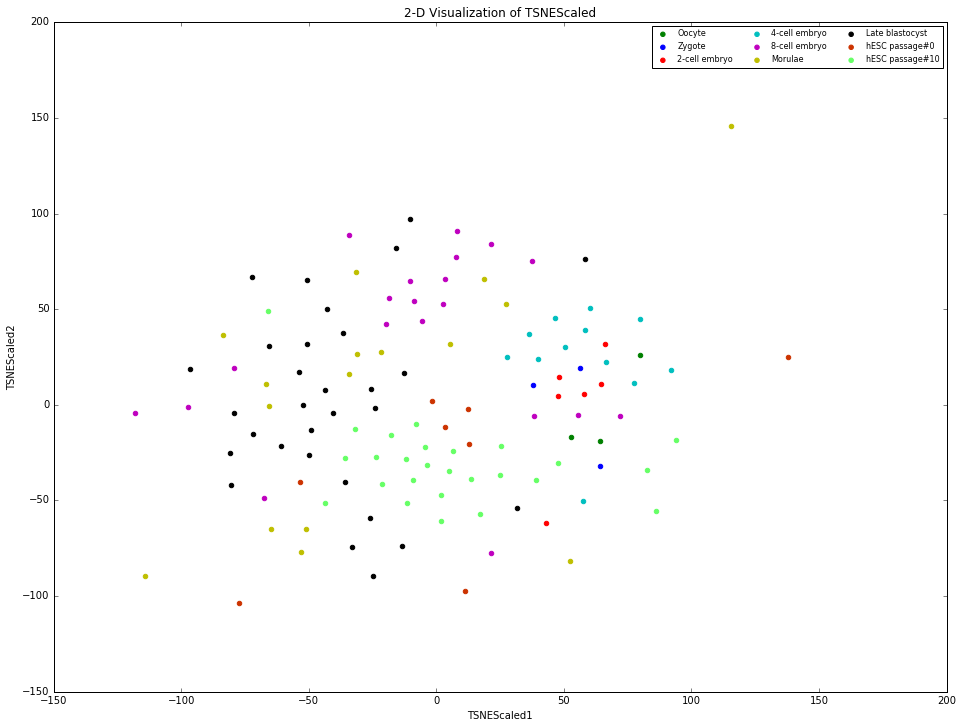

In [59]:
draw_plot2d(tsne_scaled_result,"TSNEScaled")

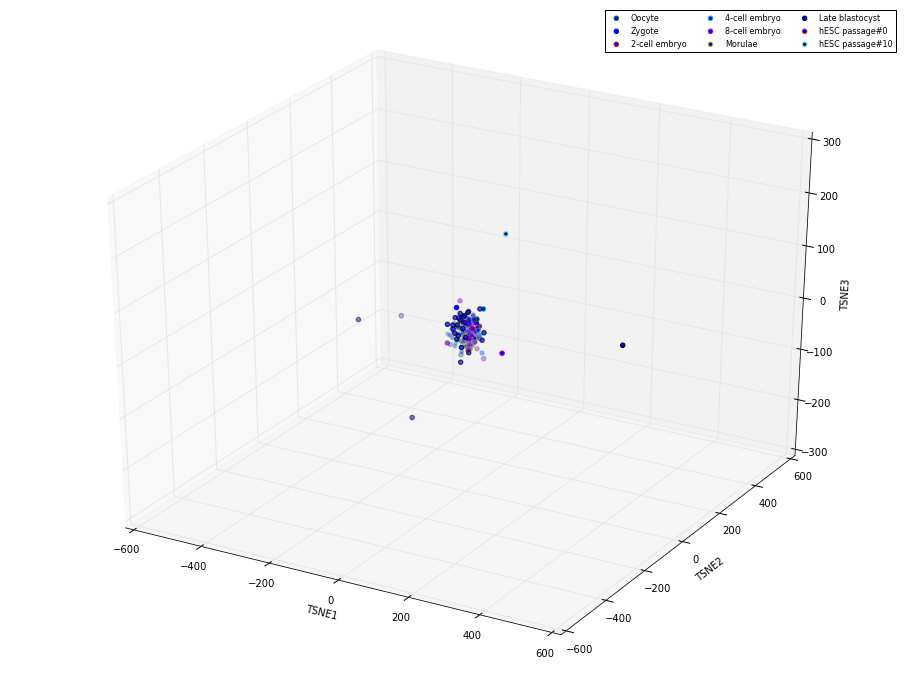

In [65]:
draw_plot3d(tsne3_result,"TSNE")

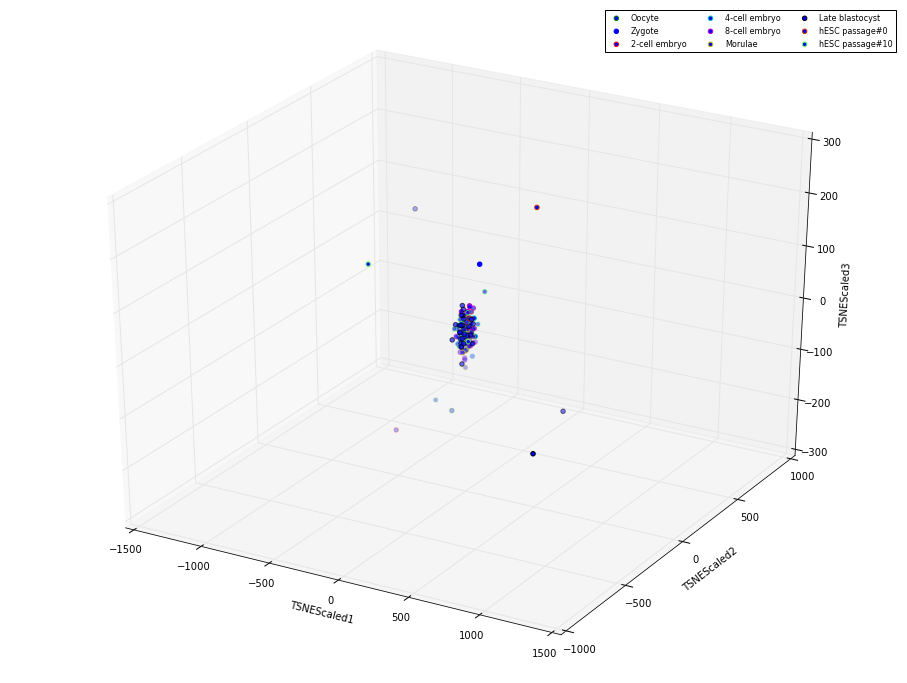

In [67]:
draw_plot3d(tsne3_scaled_result,"TSNEScaled")

TSNE is not good at seperating different cell types.

# 1.4 PCA

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA()
pca_result = pca.fit_transform(df_array[:,:-1])

In [70]:
pca_scale_result = pca.fit_transform(df_array_scale)

In [71]:
pca_result.shape

(124, 124)

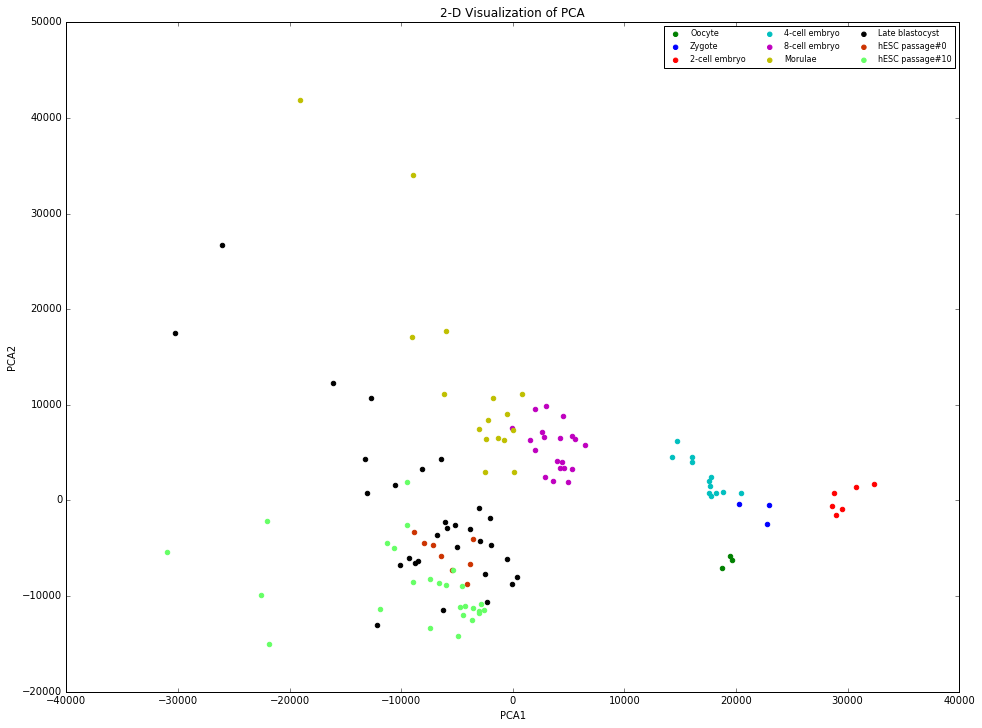

In [72]:
draw_plot2d(pca_result,"PCA")

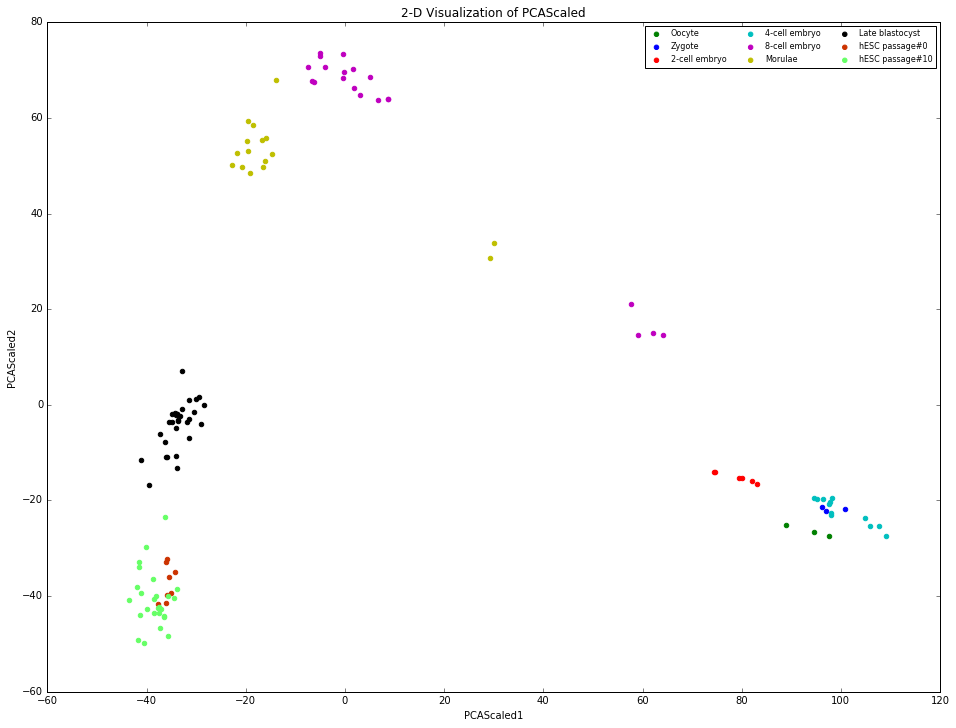

In [74]:
draw_plot2d(pca_scale_result,"PCAScaled")

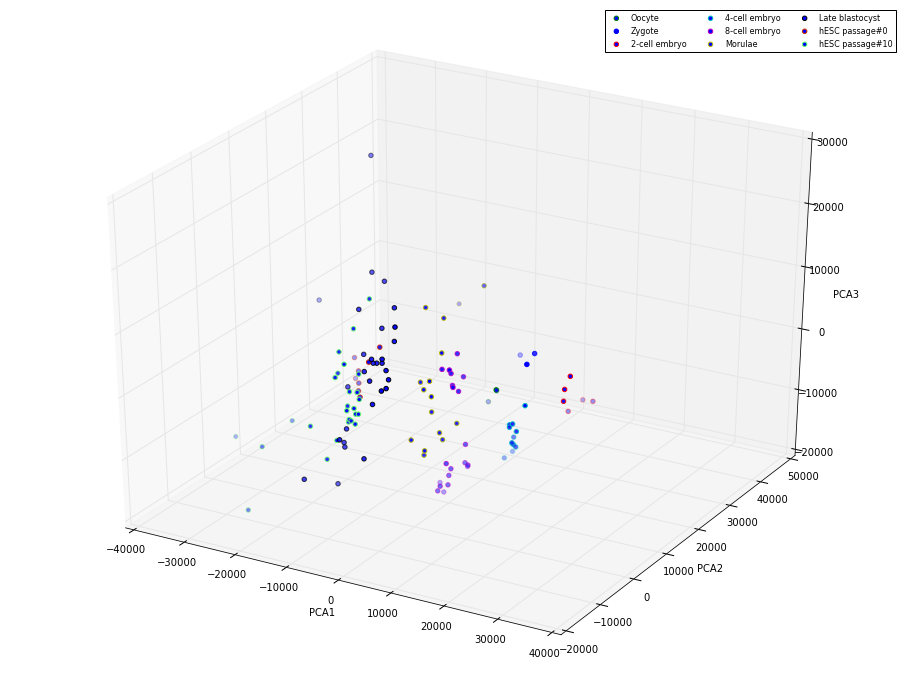

In [75]:
draw_plot3d(pca_result,"PCA")

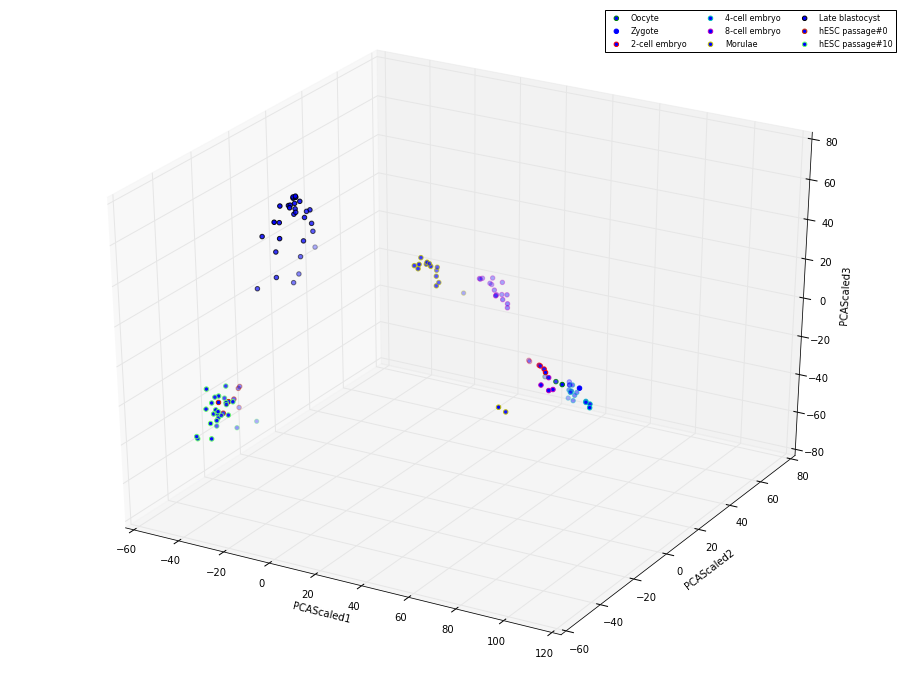

In [76]:
draw_plot3d(pca_scale_result,"PCAScaled")

PCA is good for visualization if the data is scaled. Otherwise not good for visualization.

# 1.5 FA

In [99]:
from sklearn.decomposition import FactorAnalysis

In [101]:
fa = FactorAnalysis(n_components=2)

In [102]:
fa_result = fa.fit_transform(df_array[:,:-1])

In [103]:
fa_scaled_result = fa.fit_transform(df_array_scale)

In [104]:
fa3 = FactorAnalysis(n_components=3)

In [105]:
fa3_result = fa3.fit_transform(df_array[:,:-1])

In [106]:
fa3_scaled_result = fa3.fit_transform(df_array_scale)

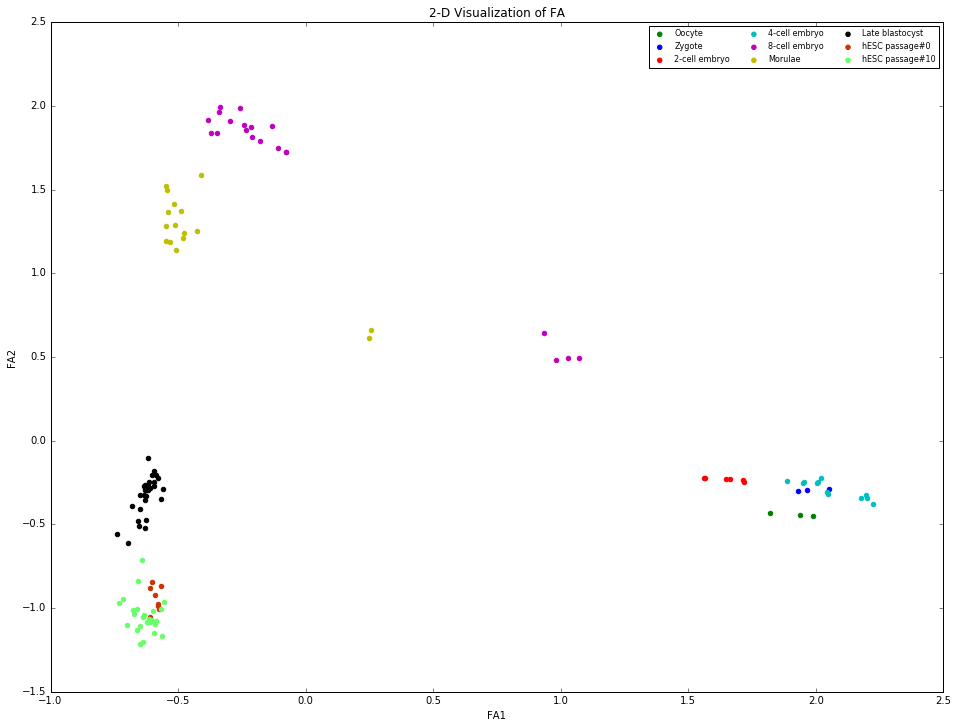

In [107]:
draw_plot2d(fa_result,"FA")

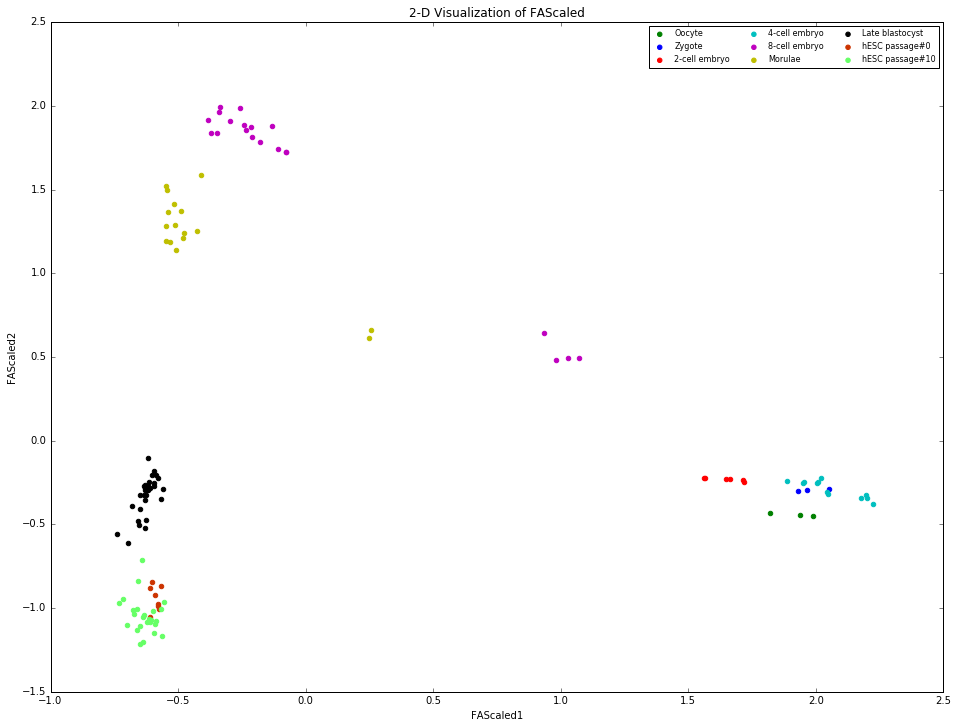

In [108]:
draw_plot2d(fa_scaled_result,"FAScaled")

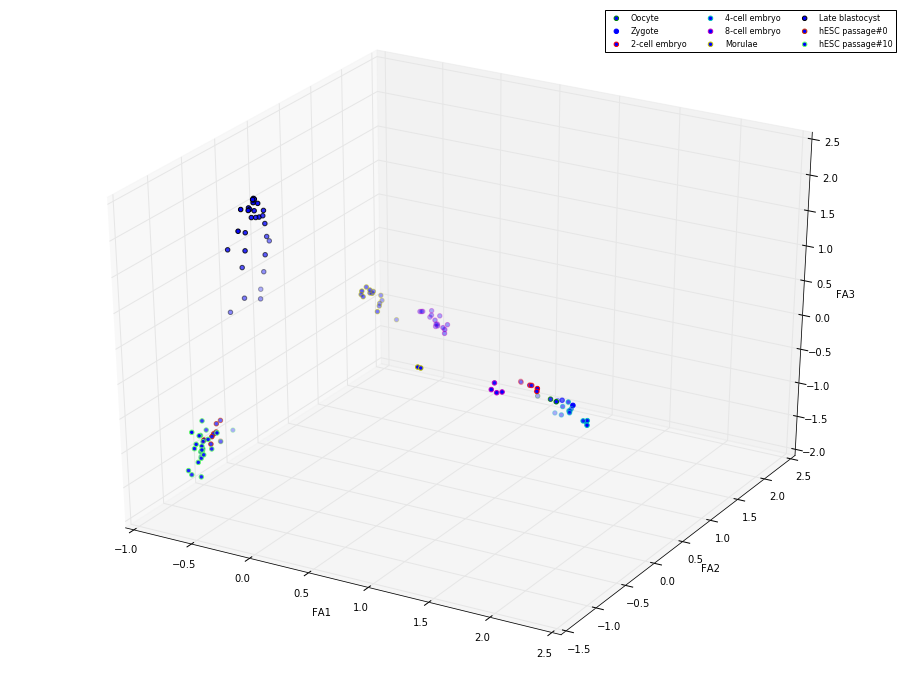

In [109]:
draw_plot3d(fa3_result,"FA")

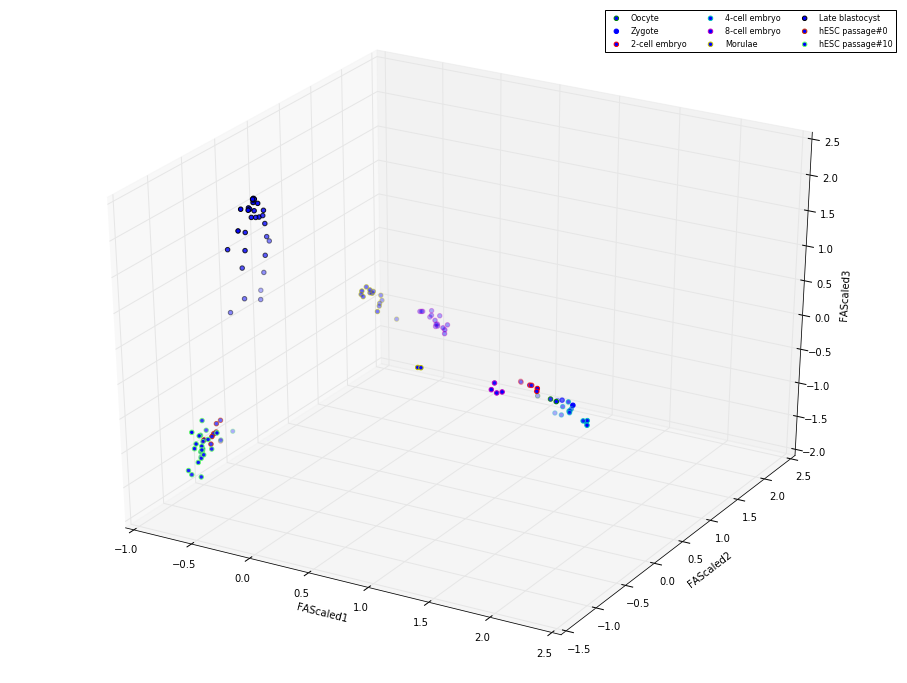

In [110]:
draw_plot3d(fa3_scaled_result,"FAScaled")

Factor Analysis is good for visualization.

# 1.6 ICA

In [77]:
from sklearn.decomposition import FastICA

In [78]:
ica = FastICA(n_components=2,random_state=0)
ica_result = ica.fit_transform(df_array[:,:-1])

In [79]:
ica_scaled_result = ica.fit_transform(df_array_scale)

In [80]:
ica3 = FastICA(n_components=3,random_state=0)
ica3_result = ica3.fit_transform(df_array[:,:-1])

In [81]:
ica3_scaled_result = ica3.fit_transform(df_array_scale)

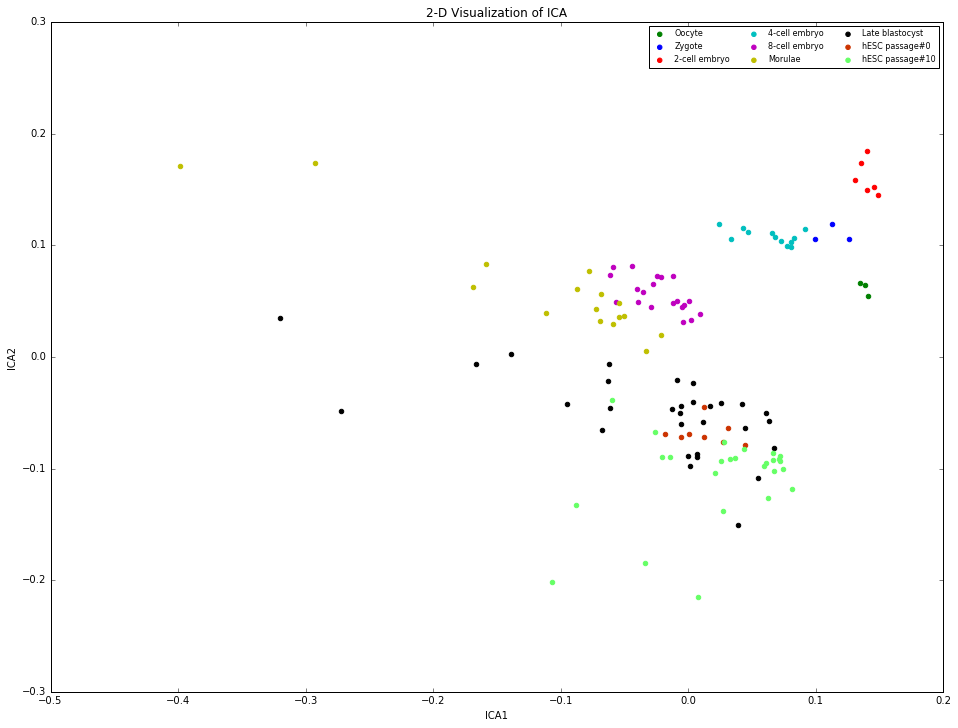

In [82]:
draw_plot2d(ica_result,"ICA")

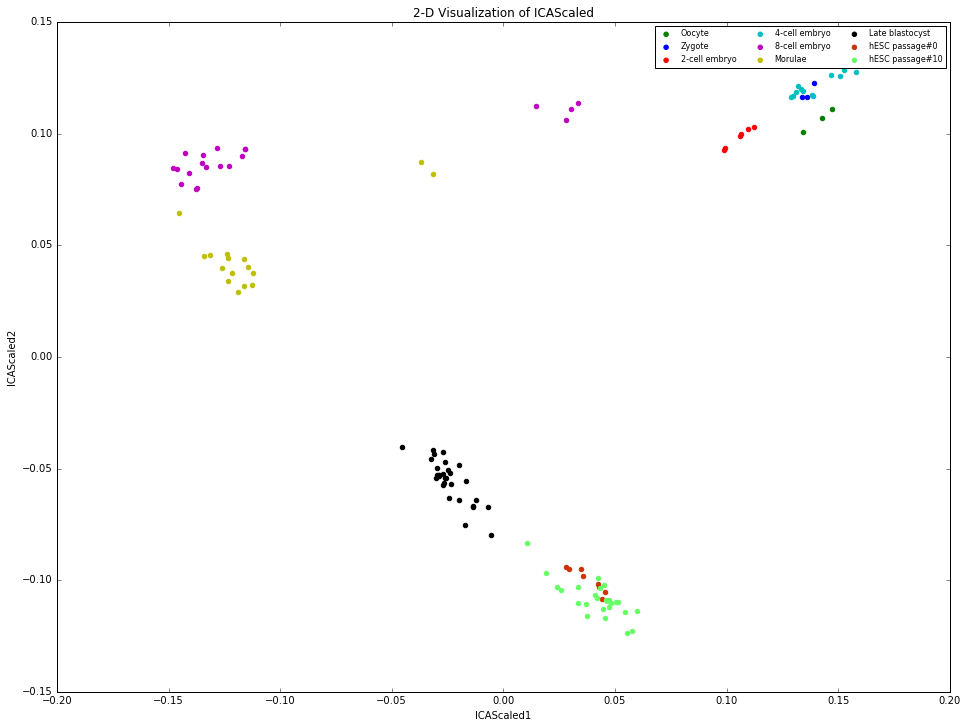

In [84]:
draw_plot2d(ica_scaled_result,"ICAScaled")

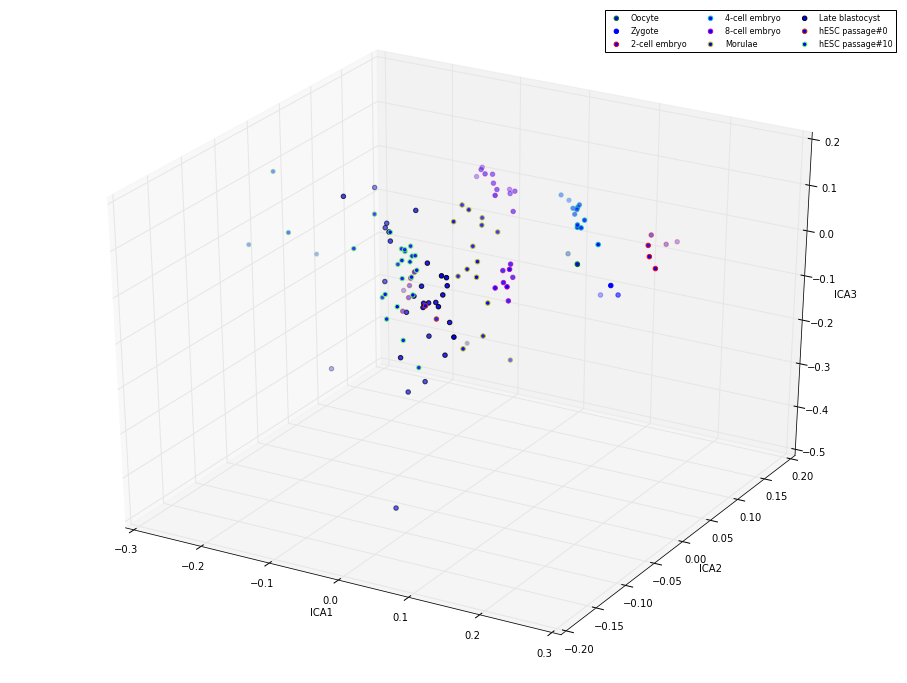

In [85]:
draw_plot3d(ica3_result,"ICA")

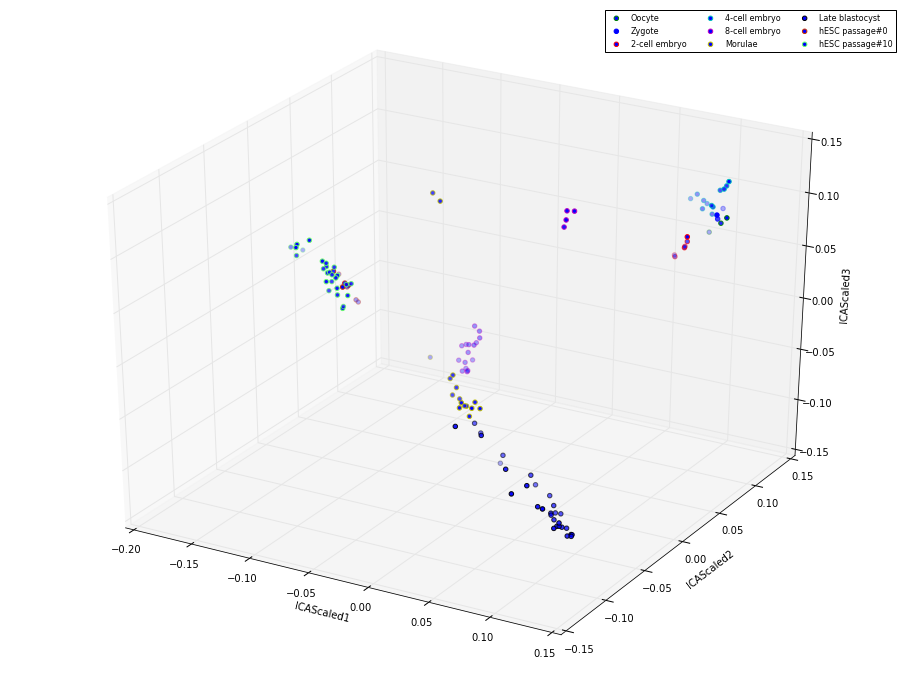

In [86]:
draw_plot3d(ica3_scaled_result,"ICAScaled")

ICA is good for visualization if the data is scaled.

# 1.7 MDS

In [87]:
from sklearn.manifold import MDS

In [88]:
mds = MDS(n_components=2,random_state=0)

In [89]:
mds_result = mds.fit_transform(df_array[:,:-1])

In [90]:
mds_scaled_result = mds.fit_transform(df_array_scale)

In [91]:
mds3 = MDS(n_components=3,random_state=0)

In [92]:
mds3_result = mds3.fit_transform(df_array[:,:-1])

In [93]:
mds3_scaled_result = mds3.fit_transform(df_array_scale)

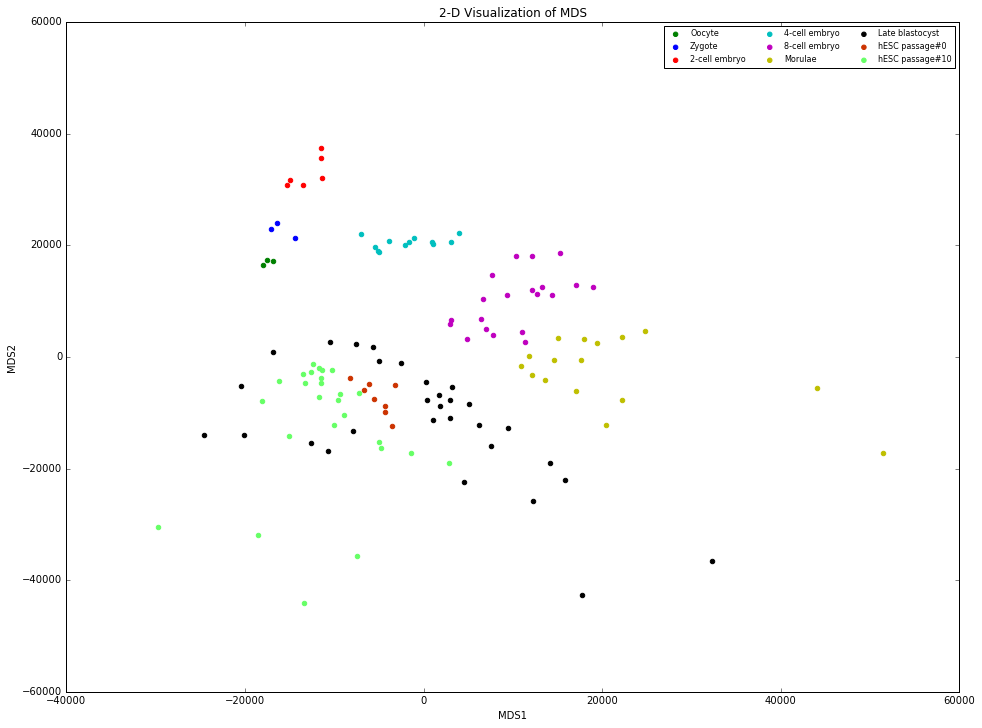

In [94]:
draw_plot2d(mds_result,"MDS")

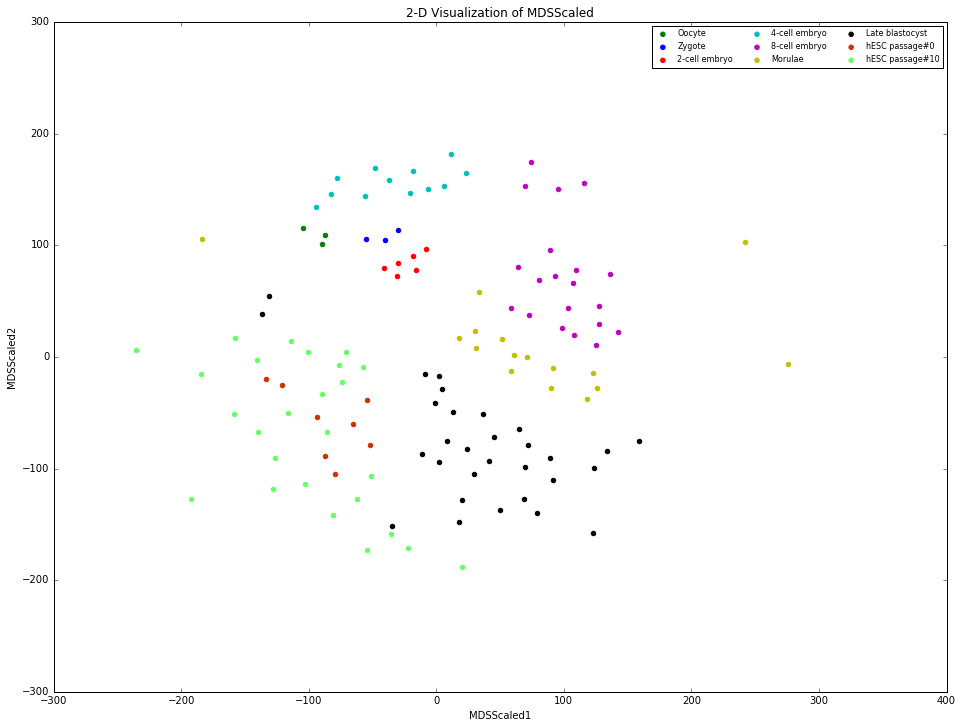

In [95]:
draw_plot2d(mds_scaled_result,"MDSScaled")

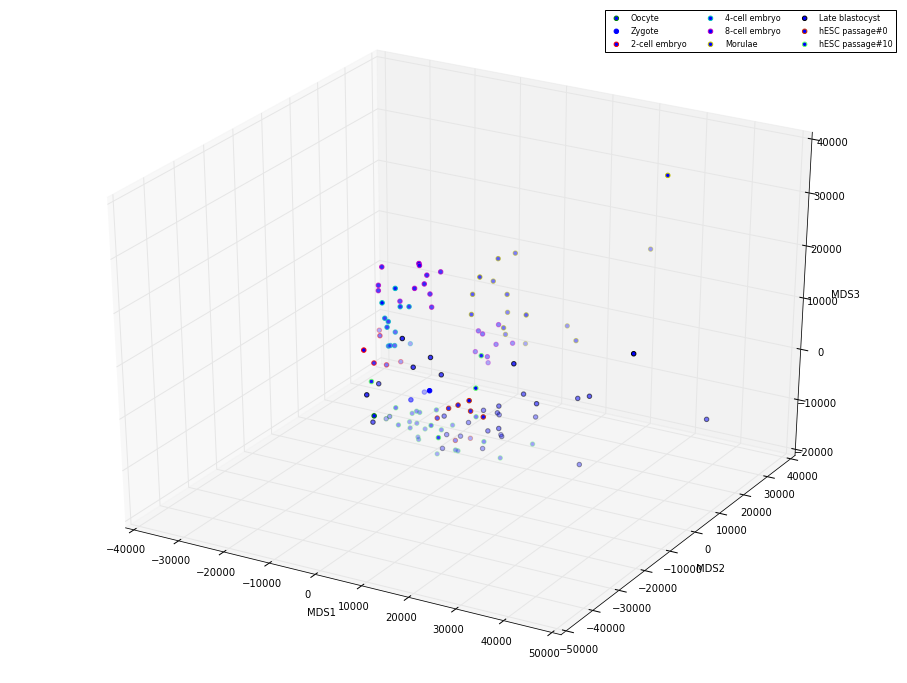

In [96]:
draw_plot3d(mds3_result,"MDS")

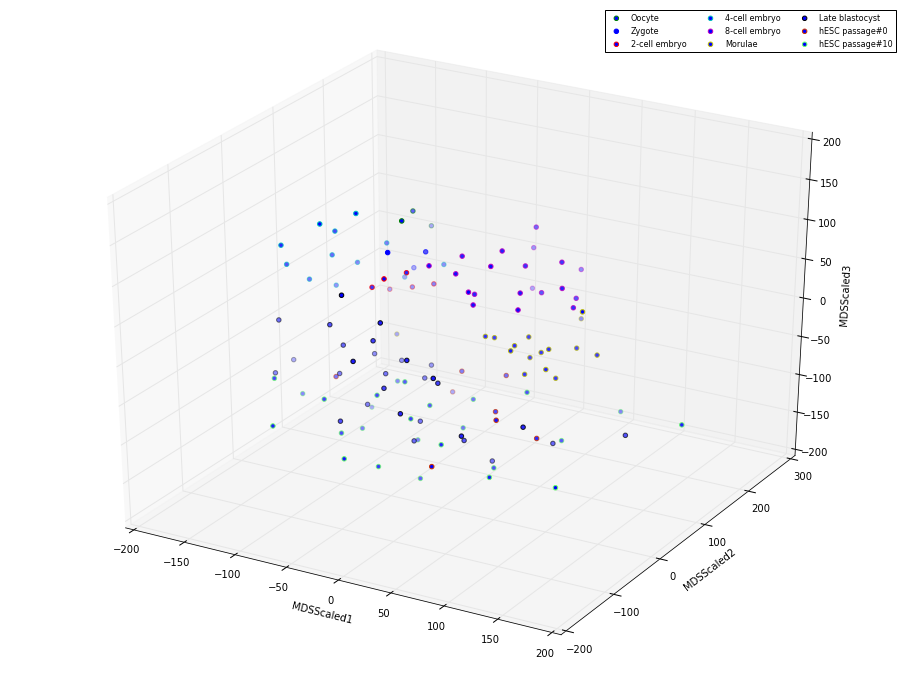

In [97]:
draw_plot3d(mds3_scaled_result,"MDSScaled")

MDS is hard to seperate different type of cells.

# 2. Clustering

In [98]:
## k-means, birch, dbscan

# 2.1 KMeans

In [111]:
from sklearn.cluster import KMeans

In [112]:
kmeans = KMeans(n_clusters=9, n_init=20,random_state=0).fit(df_array[:,:-1])

In [113]:
kmeans.labels_

array([5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 6, 0, 0, 6, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 7, 4, 7], dtype=int32)

In [114]:
kmeans_scale = KMeans(n_clusters=9,random_state=0,n_init=20).fit(df_array_scale)

In [115]:
kmeans_scale.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 3, 2, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 4], dtype=int32)

In [116]:
# compare to the ground truth
target

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8])

In [117]:
from scipy import stats

In [118]:
def clustering_error(r,cell_labels): # r: kmeans_scale.labels_  cell_labels:target
    #len = len(r)
    rss = 0
    cls = [[np.where(r==0)[0]],[np.where(r==1)[0]],[np.where(r==2)[0]],
           [np.where(r==3)[0]],[np.where(r==4)[0]],[np.where(r==5)[0]],
           [np.where(r==6)[0]],[np.where(r==7)[0]],[np.where(r==8)[0]]
          ]
    for i in range(9):
        modeClass = stats.mode(cell_labels[cls[i]])[0][0]
        rss = rss + np.sum(cell_labels[cls[i]]!=modeClass)  # length(cls[[i]])/len
    return rss

In [119]:
clustering_error(kmeans_scale.labels_,target)

36

In [120]:
clustering_error(kmeans.labels_,target)

28

Here the clustering error in our calculation: the non-scaled data has lower error when it applies to kmeans clustering.

# 2.2 Birch

In [121]:
from sklearn.cluster import Birch

In [124]:
from scipy.spatial import distance_matrix

In [125]:
dist = distance_matrix(df_array[:,:-1],df_array[:,:-1])

In [126]:
dist_scale = distance_matrix(df_array_scale,df_array_scale)

In [127]:
# k = 5, plot the distance 
def k_nearest_neighbor_distance(dist,k):
    k_near_neighbor_dist = []
    dist_cp = dist.copy()
    for i in range(dist.shape[0]):
        dist_cp[i,:].sort()
        k_near_neighbor_dist.append(dist_cp[i,:][k])
    return k_near_neighbor_dist

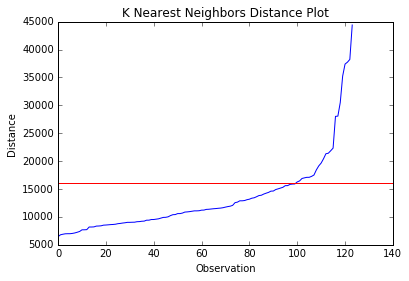

In [128]:
plt.plot(np.arange(len(dist)),sorted(k_nearest_neighbor_distance(dist,5)))
plt.axhline(y=16000,c="r")
plt.title("K Nearest Neighbors Distance Plot")
plt.ylabel("Distance")
plt.xlabel("Observation")
## find the knee

Use k nearest neighbors plot to help find the threshold. (find the knee)

In [122]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=18000, compute_labels=True)
brc.fit(df_array[:,:-1])

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=18000)

In [123]:
brc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 5])

We have only 6 clusters. So we need to specify the n_clusters = 9.

In [296]:
# del len

In [129]:
brc = Birch(branching_factor=50, n_clusters=9, threshold=16000, compute_labels=True)
brc.fit(df_array[:,:-1])

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=9,
   threshold=16000)

Here we lower our threshold because otherwise there will be less than 9 clusters.

In [130]:
brc.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 7, 6, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       2, 8, 8, 8, 2, 7, 8, 7, 8, 8, 8, 8, 7, 8, 8, 4, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0])

In [131]:
clustering_error(brc.labels_,target)

51

The clustering error is larger than kmeans.

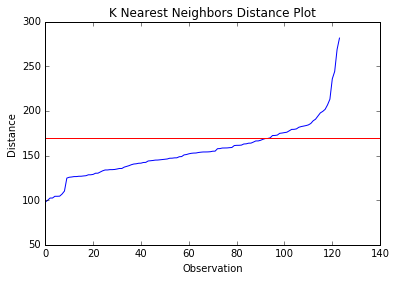

In [339]:
plt.plot(np.arange(len(dist_scale)),sorted(k_nearest_neighbor_distance(dist_scale,5)))
plt.axhline(y=170,c="r")
plt.title("K Nearest Neighbors Distance Plot")
plt.ylabel("Distance")
plt.xlabel("Observation")

In [143]:
brc_scaled = Birch(branching_factor=50, n_clusters=9, threshold=110, compute_labels=True).fit(df_array_scale)

In [144]:
brc_scaled.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 8, 0, 4])

In [145]:
clustering_error(brc_scaled.labels_,target)

49

Not well clustered.

# 2.3 DBSCAN

In [132]:
from sklearn.cluster import DBSCAN

In [146]:
dbscan = DBSCAN(eps=16000,min_samples=5)

In [147]:
dbscan.fit(df_array[:,:-1])

DBSCAN(algorithm='auto', eps=16000, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [148]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,
        2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1])

DBSCAN only generate 3 clusters, which is far less than the true number of clusters that we have

In [151]:
### don't have a significant result
dbscan_scale = DBSCAN(eps=170,min_samples=5).fit(df_array_scale)
dbscan_scale.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1])

In [152]:
dbscan_scale = DBSCAN(eps=110,min_samples=5).fit(df_array_scale)
dbscan_scale.labels_

array([-1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1])

DBSCAN on sclaed data also generate far less clusters than the true number of clusters(9) that we have.